# Happiness - Assignment 1
```
James Ambat
Assignment 1
CS-663
```

# My Setup

From the terminal, create and activate the virtual environment:
```
cd happiness-jaambat
mkdir venv
python3 -m venv ./venv
source venv/bin/activate
```

I used PyCharm IDE for development and linked the interpreter with the following steps:
```
Pycharm -> Settings -> Project: happiness-jaambat
Python Interpretter -> Add Interpretter
Add Local Interpretter -> /happiness-jaambat/venv
```

From the terminal, install the required libraries:
```
pip install -r requirements.txt
```

### __Import the libraries for use in the assignment__

In [166]:
import pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

# Question 1
## The following questions will be addressed in separate headers and cells:
1.1 What is your evaluation of the quality of the data?
1.2 How large is the dataset?
1.3 What are the features (columns) and how are they represented?
1.4 Are there any interesting distributions in the (numeric) features?
1.5 Are there any interesting correlations in the data?
1.6 Can you identify any limitations, missing values or distortions of the data?
1.7 What would you like to see in this dataset?

#### Read in the data so that it can be analyzed
From the routine below, there is only one sheet named **Sheet1**

In [105]:
whr_file = "./DataForTable2.1WHR2023.xls"
whr_data_frame = pd.ExcelFile(whr_file)
sheet_names = whr_data_frame.sheet_names
print(f"The sheets in the excel file: {str(sheet_names)}")
print(f"Number of sheets in the excel file {len(sheet_names)}")

The sheets in the excel file: ['Sheet1']
Number of sheets in the excel file 1


#### The single sheet is read-in:

In [106]:
sheet_name = sheet_names[0]
whr_data_frame = pd.read_excel(io=whr_file, sheet_name=sheet_name)

## 1.1 What is your evaluation of the quality of the data?
* To evaluate the data, it is necessary to inspect relevant information such as occurrences, mean, standard deviation, min, max, and distribution.
  * The routines used to acquire this data are outlined in the cells **below**. See header **1.1 Calculations**.
* 1.1.a - While we can inspect a range index of **2199** rows in the data frame, **Country Name, year, and Life Ladder** are the only features that have non-null values that match the quantities of the entire index range. The rest of the features are missing some entries.
  * For example, perceptions of corruption is actually missing (116) entries which represents ~5.2% of missing data.
* 1.1.b - At this point in the evaluation, I use the dataframe's describe() info and calculation of the `std < mean + min`, to see if there may be any erroneous data from just this calculation.
  * **These will be later evaluated with bar charts, skewness, and kurtosis evaluations in Question 1.4.**
    * See __Question 1.4 - interesting distributions in the (numeric) features__
  * **year** - Its **standard deviation** is less than its `mean + min value`
  * **Life Ladder** - Its **standard deviation** is less than its `mean + min value`
  * **Log GDP per capita** - Its **standard deviation** is less than its `mean + min value`
  * **Social support** - Its **standard deviation** is less than its `mean + min value`
  * **Healthy life expectancy at birth** - Its **standard deviation** is less than its `mean + min value`
  * **Freedom to make life choices** - Its **standard deviation** is less than its `mean + min value`
  * **Generosity** - Its standard deviation is **greater** than its `mean + min value`
  * **Perception of corruption** - Its **standard deviation** is less than its `mean + min value`
  * **Positive affect** - Its **standard deviation** is less than its `mean + min value`
  * **Negative affect** - Its **standard deviation** is less than its `mean + min value`
* 1.1.c - `std < mean + min` calculations are tabulated below and the calculations are outlined in the **1.1 Calculations**:
```
                                                                    std < mean + min?
year            || Std: 4.719 || Mean: 2014.161 || Min: 2005.000 || ( True )
Life Ladder     || Std: 1.126 || Mean:    5.479 || Min:    1.281 || ( True )
Log GDP pe...   || Std: 1.153 || Mean:    9.390 || Min:    5.527 || ( True )
Social sup...   || Std: 0.121 || Mean:    0.811 || Min:    0.228 || ( True )
Healthy li...   || Std: 6.901 || Mean:   63.295 || Min:    6.720 || ( True )
Freedom to...   || Std: 0.140 || Mean:    0.748 || Min:    0.258 || ( True )
Generosity      || Std: 0.161 || Mean:    0.000 || Min:   -0.338 || ( False )
Perception...   || Std: 0.186 || Mean:    0.745 || Min:    0.035 || ( True )
Positive a...   || Std: 0.106 || Mean:    0.652 || Min:    0.179 || ( True )
Negative a...   || Std: 0.087 || Mean:    0.272 || Min:    0.083 || ( True )
```

## The following notes on quality have been taken:
* The data is missing entries and is not entirely complete.
* The `Healthy Life Expectancy at Birth` feature has extrapolated and interpolated data (not real data).
* We assume `generosity` has a range from -1 to 1, but this is not certain or documented in the **World Happiness Report** webpage or the report's **Statistical Appendix 1 for Chapter 2**.
* **Generosity's** standard deviation is **greater** than its `mean + min value`

#### 1.1 Calculations

In [107]:
# 1.1.a
whr_data_frame.info(memory_usage=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2199 non-null   object 
 1   year                              2199 non-null   int64  
 2   Life Ladder                       2199 non-null   float64
 3   Log GDP per capita                2179 non-null   float64
 4   Social support                    2186 non-null   float64
 5   Healthy life expectancy at birth  2145 non-null   float64
 6   Freedom to make life choices      2166 non-null   float64
 7   Generosity                        2126 non-null   float64
 8   Perceptions of corruption         2083 non-null   float64
 9   Positive affect                   2175 non-null   float64
 10  Negative affect                   2183 non-null   float64
dtypes: float64(9), int64(1), object(1)

In [108]:
# 1.1.b
whr_data_frame.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,2199.000000,2199.000000,2179.000000,2186.000000,2145.000000,2166.000000,2126.000000,2083.000000,2175.000000,2183.000000
mean,2014.161437,5.479226,9.389766,0.810679,63.294583,0.747858,0.000096,0.745195,0.652143,0.271501
std,4.718736,1.125529,1.153387,0.120952,6.901104,0.140150,0.161083,0.185837,0.105922,0.086875
min,2005.000000,1.281271,5.526723,0.228217,6.720000,0.257534,-0.337527,0.035198,0.178886,0.082737
25%,2010.000000,4.646750,8.499764,0.746609,59.119999,0.656528,-0.112116,0.688139,0.571684,0.207660
50%,2014.000000,5.432437,9.498955,0.835535,65.050003,0.769821,-0.022671,0.799654,0.663063,0.260671
75%,2018.000000,6.309460,10.373216,0.904792,68.500000,0.859382,0.092070,0.868827,0.737936,0.322894
max,2022.000000,8.018934,11.663788,0.987343,74.474998,0.985178,0.702708,0.983276,0.883586,0.704590


In [109]:
# 1.1.c Analysis of distribution properties for each feature when utilizing std < mean + min calculation.
import pandas as pd
def std_less_than_mean_min(data_frame: pd.DataFrame, numerical_features: list):
    """
    Helper method for NUMERICAL FEATURES to analyze standard deviation being less than mean + min
    :param data_frame: pandas data frame of the world happiness report.
    :param numerical_features: list of numerical features to evaluate distribution
    """
    print("%-68s std < mean + min? " % (" "))
    for feature in numerical_features:
        standard_deviation = data_frame[feature].std(axis=0)
        mean_value = data_frame[feature].mean(axis=0)
        min_value = data_frame[feature].min(axis=0)
        is_std_less_than = standard_deviation < (mean_value + min_value)

        display_feature = feature
        if len(display_feature) > 12:
            display_feature = display_feature[0:10] + "..."

        print("%-15s || Std: %0.3f || Mean: %8.3f || Min: %8.3f || ( %r )" %
              (display_feature, standard_deviation, mean_value, min_value, is_std_less_than))

# std_less_than_mean_min(data_frame=whr_data_frame)
std_less_than_mean_min(data_frame=whr_data_frame,
                       numerical_features=['year', 'Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect'])


                                                                     std < mean + min? 
year            || Std: 4.719 || Mean: 2014.161 || Min: 2005.000 || ( True )
Life Ladder     || Std: 1.126 || Mean:    5.479 || Min:    1.281 || ( True )
Log GDP pe...   || Std: 1.153 || Mean:    9.390 || Min:    5.527 || ( True )
Social sup...   || Std: 0.121 || Mean:    0.811 || Min:    0.228 || ( True )
Healthy li...   || Std: 6.901 || Mean:   63.295 || Min:    6.720 || ( True )
Freedom to...   || Std: 0.140 || Mean:    0.748 || Min:    0.258 || ( True )
Generosity      || Std: 0.161 || Mean:    0.000 || Min:   -0.338 || ( False )
Perception...   || Std: 0.186 || Mean:    0.745 || Min:    0.035 || ( True )
Positive a...   || Std: 0.106 || Mean:    0.652 || Min:    0.179 || ( True )
Negative a...   || Std: 0.087 || Mean:    0.272 || Min:    0.083 || ( True )


## 1.2 How large is the dataset?
The dataset has 2199 rows and 11 columns. But from 1.1.a calculations, we see that some features are missing data. See calculations below:

In [110]:
# 1.2
print(f"The Dataset has {len(whr_data_frame)} rows")
print(f"The Dataset has {len(whr_data_frame.columns)} columns")

The Dataset has 2199 rows
The Dataset has 11 columns


## 1.3 What are the features (columns) and how are they represented?
### There are 11 features. Those features (and their data representations) are outlined below:

* To answer this question, I cite the following reference from `https://worldhappiness.report/data/` to provide responses:
    * Statistical Appendix for "World happiness, trust and social connections in times of crisis", Chapter 2 of World Happiness Report 2023 by John F. Helliwell, Haifang Huang, Max Norton, Shun Wang and Leonard Goff - March 13, 2023

* `Country name`
  * Is an **object / str**
  * Is a categorical and nominal data type.
  * From inspection, I assume this feature represents the country from which the data in each row belongs to.
* `year`
  * Is a **number** of type int64
  * Is a numerical and ratio data type.
  * From inspection, I assume this feature represents year in which the data was acquired for each row.
* `Life Ladder`
  * Is a **number** of type float64.
  * Is a numerical and ratio data type.
  * I cite the following reference from `https://worldhappiness.report/data/` to provide a response:
    * Statistical Appendix for "World happiness, trust and social connections in times of crisis", Chapter 2 of World Happiness Report 2023 by John F. Helliwell, Haifang Huang, Max Norton, Shun Wang and Leonard Goff - March 13, 2023
  * **Section 1 - Data Sources and Variable Definitions** of the cited reference provides additional information regarding the `Life Ladder` feature. This feature is essentially a scoring from discrete numbers 0 through 10 where 0 represents the worst degree of life, which 10 is the best.
* `Log GDP per capita`
  * Is a **number** of type float64.
  * Is a numerical and interval data type. I assume a ratio data type since a difference of 2x in GDP might not necessarily mean 2x better economy.
  * **Section 1 - Data Sources and Variable Definitions** of the cited reference provides additional information regarding the `Log GDP per capita` feature. While this reference defines the GDP to be units of purchasing power, I assume that this is the GDP information taken for that current time in the year. Additionally, I note that this feature is titled with the log() of the GDP. While the reference does not explicitly state the feature is actually the logarithm of the GDP, I assume we are actually analyzing the log.
* `social support`
  * Is a **number** and pandas.DataFrame identifies it as type float64.
  * This is a **numerical** and **ratio** number.
  * **Section 1 - Data Sources and Variable Definitions** of the cited reference provides additional information regarding the `social support` feature. This feature is an average of responses to a binary (0 or 1) question where 0 represents a situation where someone **cannot** count another person in a time of need and 1 represents a situation where someone **can** count on another person in a time of need.

* `Healthy life expectancy at birth`
  * is a **number** of type float64.
  * This is a numerical and ratio data type.
  * **Section 1 - Data Sources and Variable Definitions** of the cited reference only provides the sources from where the data was acquired from (i.e. World Health Organization's Global Health Observatory) and not what it actually represents. From inspection, I assume that these are ages.
* `freedom to make life choices`
  * is a **number** of type float64
  * This is a numerical and ratio data type.
  * **Section 1 - Data Sources and Variable Definitions** of the cited reference states that this number represents the degree of satisfaction for the freedom a person has to make decisions in their life.
  * By inspection, I see this number is bounded by 0 and 1.
* `generosity`
  * is a **number** of type float64.
  * **Section 1 - Data Sources and Variable Definitions** of the cited reference states that this feature is the regressing national average to people's willingness to donate (relative to GDP per capita).
  * On inspecting the data, I see there are negative numbers and the range I assumed to be from -1 to 1.
* `perceptions of corruption`
  * pandas.DataFrame identifies this as a **number** of type float64.
  * This is a **numerical** and **ratio** number.
  * **Section 1 - Data Sources and Variable Definitions** of the cited reference states that this feature represents an average of responses to a binary (0 or 1) questions for the belief that corruption is widespread in government (0/1), in addition to the (0/1) boolean that corruption is widespread in business. And the average between the two responses is taken and taken as a measure of the national average.
* `positive effect`
  * pandas.DataFrame identifies this as a **number** of type float64
  * This is a **numerical** and **ratio** number.
  * **Section 1 - Data Sources and Variable Definitions** states that this feature represents that average of (0/1) boolean answers to 3 questions related to happiness such as (1) smiling or laughing yesterday, (2) experiencing laughter and smiling for the majority of the day, and (3) learning something interesting yesterday.
* `negative effect`
  * is a **number** of type float64
  * This is a **numerical** and **ratio** number.
  * **Section 1 - Data Sources and Variable Definitions** states that this feature represents that average of (0/1) boolean answers to 3 questions related to sadness, worry, or anger such as (1) experienced worry for the majority of yesterday, (2) experienced sadeness for the majority of yesterday, and (3) experienced anger for the most of yesterday.

## 1.4 Are there any interesting distributions in the (numeric) features?
To answer this question, I perform the following `univariate analysis` with the following steps:
 * See header **1.4 Calculations** for routines used to acquire the skewness, kurtosis, and bar graphs.

1.4.a I evaluate feature's **skewness** and **kurtosis** metrics.
1.4.b I create **bar charts** to visualize the skewness + kurtosis **and** inspect for any outliers.

The skewness and kurtosis are evaluated below:
```
year                             ||  Skewness:  -0.0767  ||  Kurtosis:  -1.072
Life Ladder                      ||  Skewness:  -0.0178  ||  Kurtosis:  -0.592
Log GDP per capita               ||  Skewness:  -0.3351  ||  Kurtosis:  -0.773
Social support                   ||  Skewness:  -1.1188  ||  Kurtosis:  1.174
Healthy life expectancy at birth ||  Skewness:  -1.1455  ||  Kurtosis:  2.990
Freedom to make life choices     ||  Skewness:  -0.6705  ||  Kurtosis:  -0.035
Generosity                       ||  Skewness:  0.7771   ||  Kurtosis:  0.832
Perceptions of corruption        ||  Skewness:  -1.4904  ||  Kurtosis:  1.814
Positive affect                  ||  Skewness:  -0.4362  ||  Kurtosis:  -0.208
Negative affect                  ||  Skewness:  0.7311   ||  Kurtosis:  0.757
```
#### Bar Charts are located in **1.4 Calculations**
While using the bar charts, noting that a skewness of **1.0** represents a perfectly normal distribution, and noting that kurtosis of **0.0** represents how much of a `tail` exists in relation to a normal distribution, we make the following observations about each of the feature's distribution:
* `Year` is not a normal distribution. It has a negative kurtosis and looks almost to be a uniform distribution.
* `Life Ladder` is does not quite appear to be a normal distribution (but it could -- since it's skew and kurtosis are close to 1.0 and 0.0 [respectively]). It has a small skew **and** there could possibly be 3 peaks and/or 3 normal distributions that are clumped together.
* `Log GDP per capita` is not a normal distribution and has a negative skew.
* `Social Support` has a large negative skew and negative kurtosis. It is not a normal distribution.
*  `Healthy life expectancy at birth` does not appear to be a normal distribution **when analyzing the entire feature's entries altogether. It has a negative skew and its kurtosis suggest higher concentration of peaks. However, when looking at the distribution, it's possible to see that multiple peaks with intermediate distributions.
* `Freedom to make life choices` appears to be a relatively normal distribution with a **slight negative skew**. Its kurtosis is near zero and its bar chart visualization supports this observation.
* `Generosity` looks to "closely" resemble a **normal distribution**. However, it has a heavy positive skew with a tail to the right. Its kurtosis is not at 0.0 (to represent a completely normal distribution) but is within less than 1 unit of measure away from 0.0.
* `Perceptions of corruption`. While analyzing all the feature's data altogether, the data does not represent a normal distribution. Its skewness and kurtosis suggest this is **not** a normal distribution. However, it appears that multiple distributions may coexist together.
* `Positive affect`. While analyzing all the feature's data altogether, the data does not represent a normal distribution. Its skewness and kurtosis suggest this is **not** a normal distribution. However, it appears that multiple distributions may coexist together.
* `Negative affect` looks to "closely" resemble a **normal distribution**. However, it has a positive skew with a tail to the right. Its kurtosis is not at 0.0 (to represent a completely normal distribution) but is within less than 1 unit of measure away from 0.0.


## 1.4 Calculations

In [111]:
# 1.4.a Skewness and Kurtosis
def print_skewness_and_kurtosis(data_frame: pandas.DataFrame, numerical_features: list):
    if data_frame is None or len(numerical_features) == 0:
        print("Must provide a data frame and numerical features.")
        return
    print("----------------------------------------------\n"
          " Skewness and Kurtosis for Numerical Features \n"
          "----------------------------------------------\n")
    for feature in numerical_features:
        feature_skewness = data_frame[[feature]].skew()
        feature_kurtosis = data_frame[[feature]].kurt()

        print("%-32s ||  Skewness:  %1.4f  ||  Kurtosis:  %3.3f" % (feature, float(feature_skewness.iloc[0]), float(feature_kurtosis.iloc[0])))

numerical_features=['year', 'Life Ladder', 'Log GDP per capita', 'Social support',
                    'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity',
                    'Perceptions of corruption', 'Positive affect', 'Negative affect']

print_skewness_and_kurtosis(data_frame=whr_data_frame, numerical_features=numerical_features)

----------------------------------------------
 Skewness and Kurtosis for Numerical Features 
----------------------------------------------

year                             ||  Skewness:  -0.0767  ||  Kurtosis:  -1.072
Life Ladder                      ||  Skewness:  -0.0178  ||  Kurtosis:  -0.592
Log GDP per capita               ||  Skewness:  -0.3351  ||  Kurtosis:  -0.773
Social support                   ||  Skewness:  -1.1188  ||  Kurtosis:  1.174
Healthy life expectancy at birth ||  Skewness:  -1.1455  ||  Kurtosis:  2.990
Freedom to make life choices     ||  Skewness:  -0.6705  ||  Kurtosis:  -0.035
Generosity                       ||  Skewness:  0.7771  ||  Kurtosis:  0.832
Perceptions of corruption        ||  Skewness:  -1.4904  ||  Kurtosis:  1.814
Positive affect                  ||  Skewness:  -0.4362  ||  Kurtosis:  -0.208
Negative affect                  ||  Skewness:  0.7311  ||  Kurtosis:  0.757


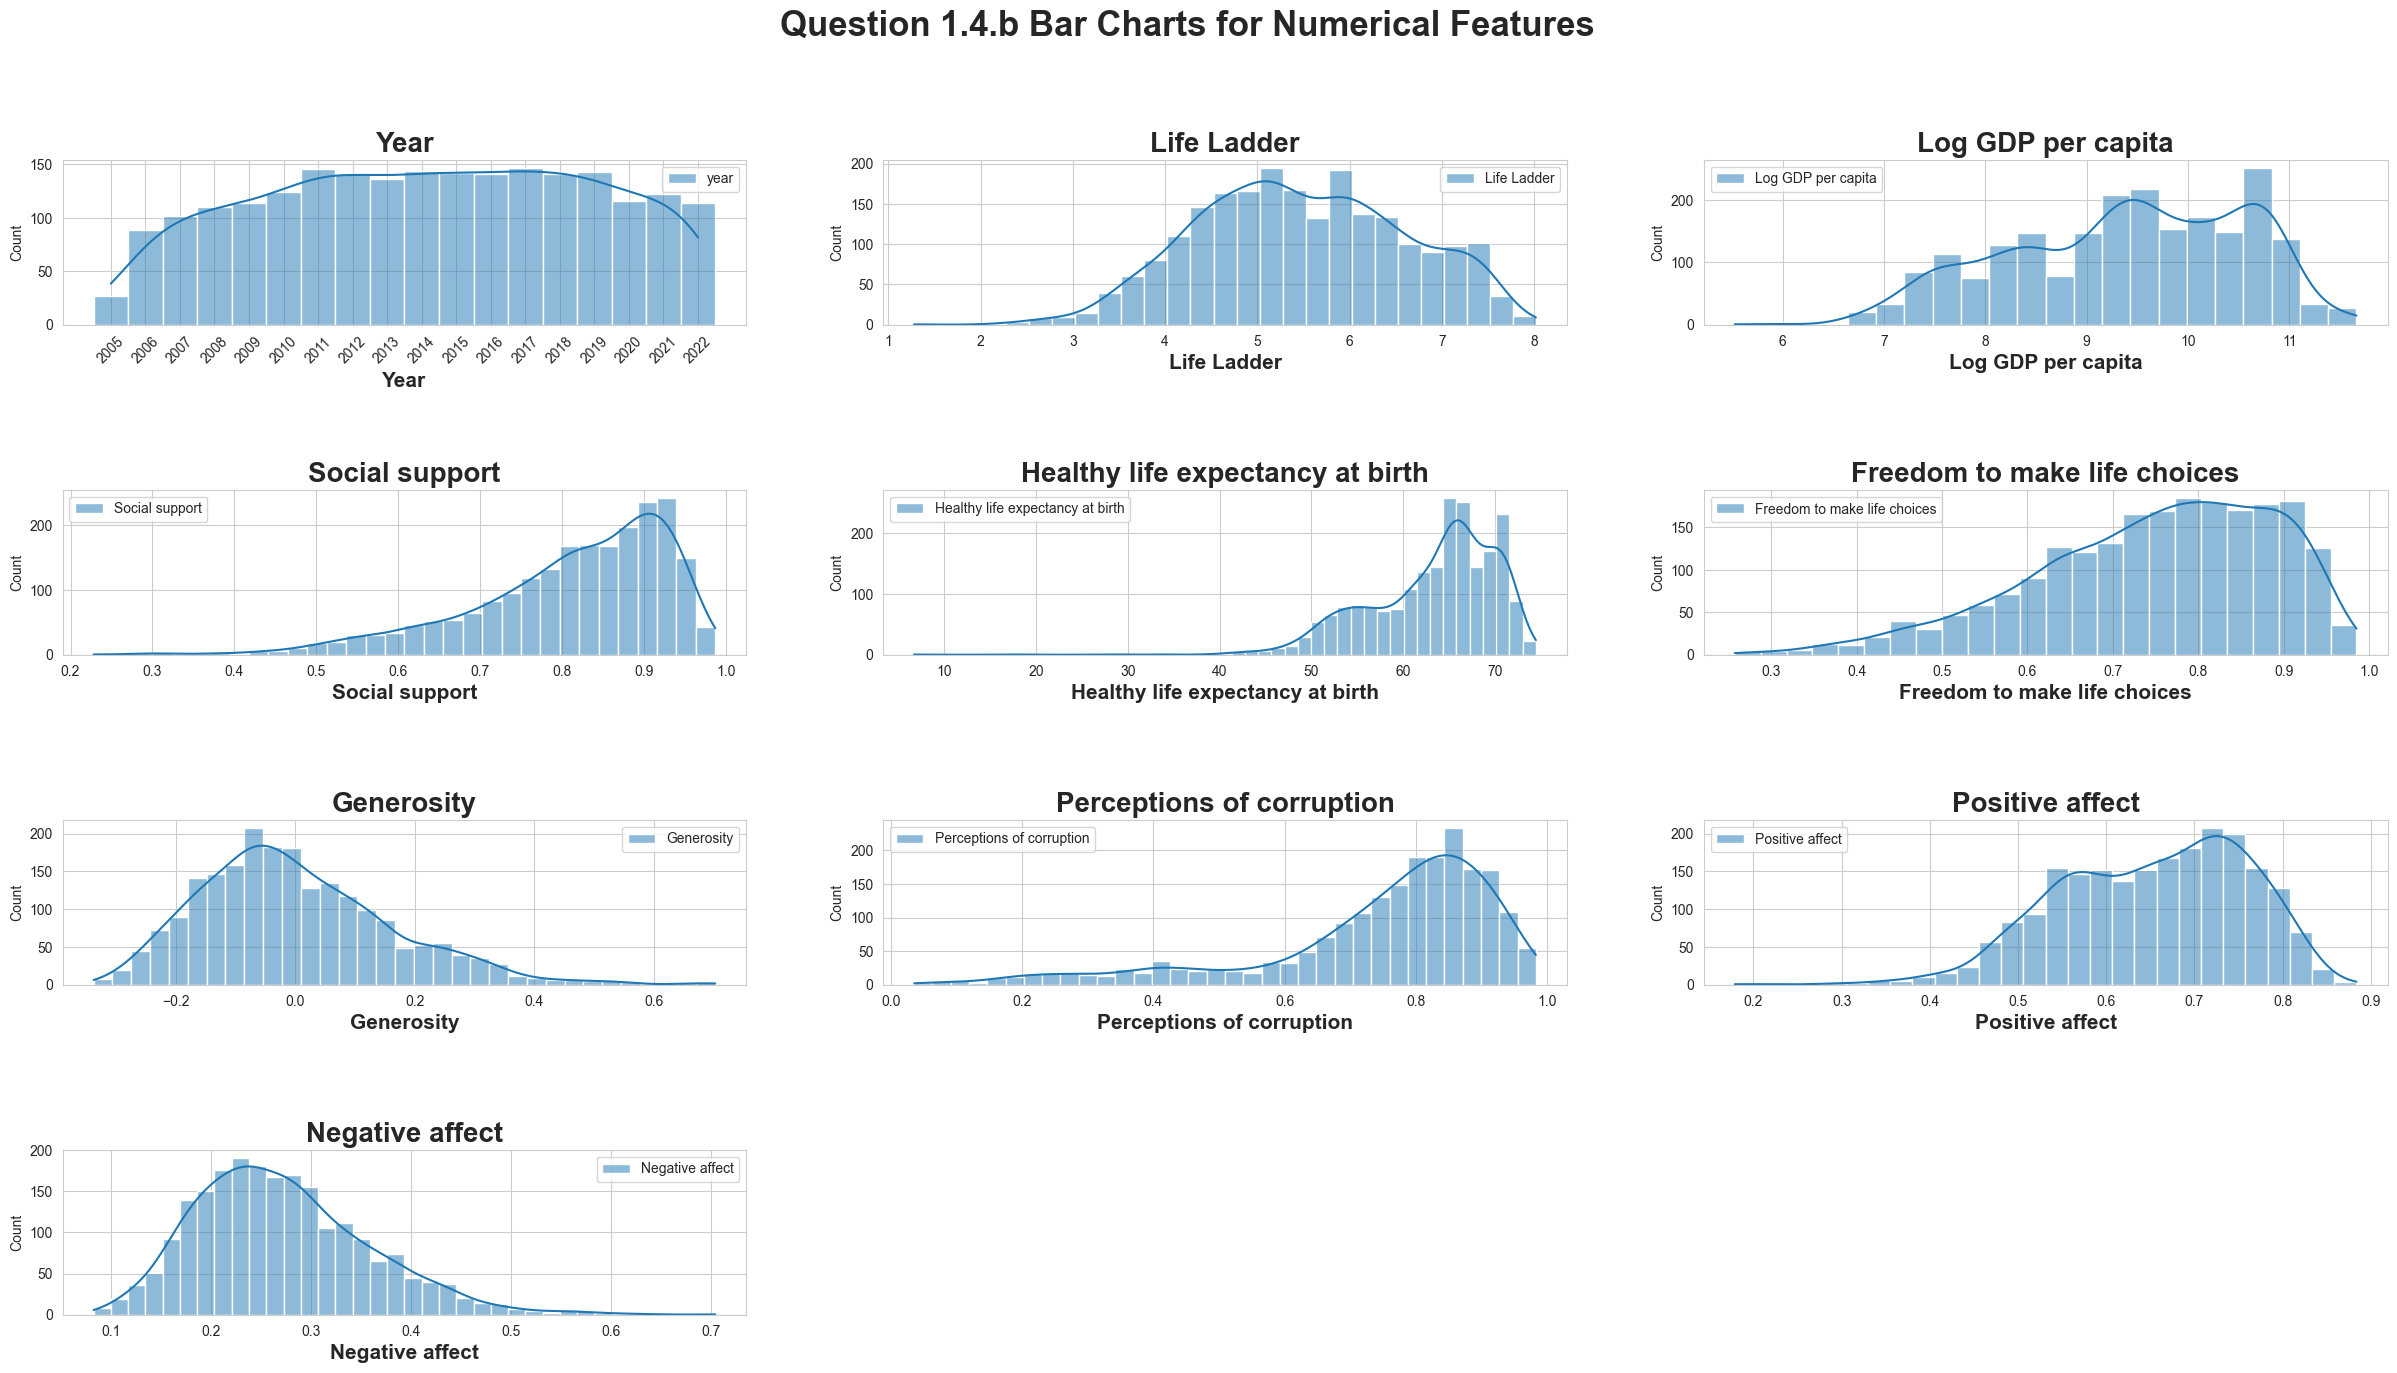

In [163]:
# 1.4.b Bar Chart
figure, axes = plt.subplots(nrows=4, ncols=3, figsize=(30, 15))  # since we have 10 features
figure.suptitle("Question 1.4.b Bar Charts for Numerical Features", fontweight="bold", fontsize=25)

# increase spacing between subplot rows so that subtitles can fit and increase size
plt.subplots_adjust(hspace=1.0)
plt.tick_params(labelsize=15)

# show whole numbered bins for clarity.
sns.histplot(data=whr_data_frame[["year"]], ax=axes[0, 0], kde=True, discrete=True, binwidth=2, bins=9)
axes[0, 0].set_title("Year", fontweight="bold", fontsize=20)
axes[0, 0].set_xlabel("Year", fontweight="bold", fontsize=15)
axes[0, 0].set_xticks(range(2005, 2023))
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45)

sns.histplot(data=whr_data_frame[["Life Ladder"]], ax=axes[0, 1], kde=True)
axes[0, 1].set_title("Life Ladder", fontweight="bold", fontsize=20)
axes[0, 1].set_xlabel("Life Ladder", fontweight="bold", fontsize=15)

sns.histplot(data=whr_data_frame[["Log GDP per capita"]], ax=axes[0, 2], kde=True)
axes[0, 2].set_title("Log GDP per capita", fontweight="bold", fontsize=20)
axes[0, 2].set_xlabel("Log GDP per capita", fontweight="bold", fontsize=15)

sns.histplot(data=whr_data_frame[["Social support"]], ax=axes[1, 0], kde=True)
axes[1, 0].set_title("Social support", fontweight="bold", fontsize=20)
axes[1, 0].set_xlabel("Social support", fontweight="bold", fontsize=15)

sns.histplot(data=whr_data_frame[["Healthy life expectancy at birth"]], ax=axes[1, 1], kde=True)
axes[1, 1].set_title("Healthy life expectancy at birth", fontweight="bold", fontsize=20)
axes[1, 1].set_xlabel("Healthy life expectancy at birth", fontweight="bold", fontsize=15)

sns.histplot(data=whr_data_frame[["Freedom to make life choices"]], ax=axes[1, 2], kde=True)
axes[1, 2].set_title("Freedom to make life choices", fontweight="bold", fontsize=20)
axes[1, 2].set_xlabel("Freedom to make life choices", fontweight="bold", fontsize=15)

sns.histplot(data=whr_data_frame[["Generosity"]], ax=axes[2, 0], kde=True)
axes[2, 0].set_title("Generosity", fontweight="bold", fontsize=20)
axes[2, 0].set_xlabel("Generosity", fontweight="bold", fontsize=15)

sns.histplot(data=whr_data_frame[["Perceptions of corruption"]], ax=axes[2, 1], kde=True)
axes[2, 1].set_title("Perceptions of corruption", fontweight="bold", fontsize=20)
axes[2, 1].set_xlabel("Perceptions of corruption", fontweight="bold", fontsize=15)

sns.histplot(data=whr_data_frame[["Positive affect"]], ax=axes[2, 2], kde=True)
axes[2, 2].set_title("Positive affect", fontweight="bold", fontsize=20)
axes[2, 2].set_xlabel("Positive affect", fontweight="bold", fontsize=15)

sns.histplot(data=whr_data_frame[["Negative affect"]], ax=axes[3, 0], kde=True)
axes[3, 0].set_title("Negative affect", fontweight="bold", fontsize=20)
axes[3, 0].set_xlabel("Negative affect", fontweight="bold", fontsize=15)

# only 10 features, don't show the remaining axes
axes[3, 1].axis("off")
axes[3, 2].axis("off")

plt.show()

# 1.5 Are there any interesting correlations in the data?
To evaluate this question, a correlation matrix is used to assess any bi-variate relationships between the features.
**See header **1.5 Calculation.**

When inspecting the correlation matrix heatmap, I considered correlations at `0.8+` to be as strong correlations. Any correlation between `0.6 and 0.8` are considered to be a weak correlations. Any correlations that have significantly less 0.6 will **not** be considered to have a significant correlation.

For each of the features, I annotate weak and strong correlations below:
__Life Ladder__
* `Life Ladder`'s correlations with:
  * `Log GDP per captia` is **0.78** and is a weak correlation.
  * `Social support` is **0.72** and is a weak correlation.
  * `Healthy Life Expectancy at Birth` is **0.71** and is a weak correlation.

-------------------------------------------------------------------------------
__Log GDP per Capita__
* `Log GDP per Capita`'s correlations with:
  * `Life Ladder` is **0.78** and is a weak correlation.
  * `Social support` is **0.68** and is a weak correlation.
  * `Healthy Life Expectancy at Birth` is **0.82** and is a strong correlation.

-------------------------------------------------------------------------------
__Social Support__
* `Social support`'s correlations with:
  * `Life Ladder` is **0.72** and is a weak correlation.
  * `Log GDP per capita` is **0.68** and is a weak correlation.
  * `Healthy Life Expectancy at Birth` is **0.60** and is a weak correlation.
-------------------------------------------------------------------------------
__Healthy Life Expectancy at Birth__
* `Healthy Life Expectancy at Birth`'s correlations with:
  * `Life Ladder` is **0.71** and is a weak correlation.
  * `Log GDP per capita` is **0.82** and is a strong correlation.
  * `Social Support` is **0.60** and is a weak correlation.
-------------------------------------------------------------------------------
__Really weak correlation that was observed__
* I observed a correlation of **0.58** between `Freedom to make life choices` and `Positive affect`. While a correlation of 0.58 falls below the threshold of **0.6** to be considered a weak correlation, it is possible that a very weak correlation exists here since its value is close to the 0.6 threshold.
-------------------------------------------------------------------------------


## 1.5 Calculations

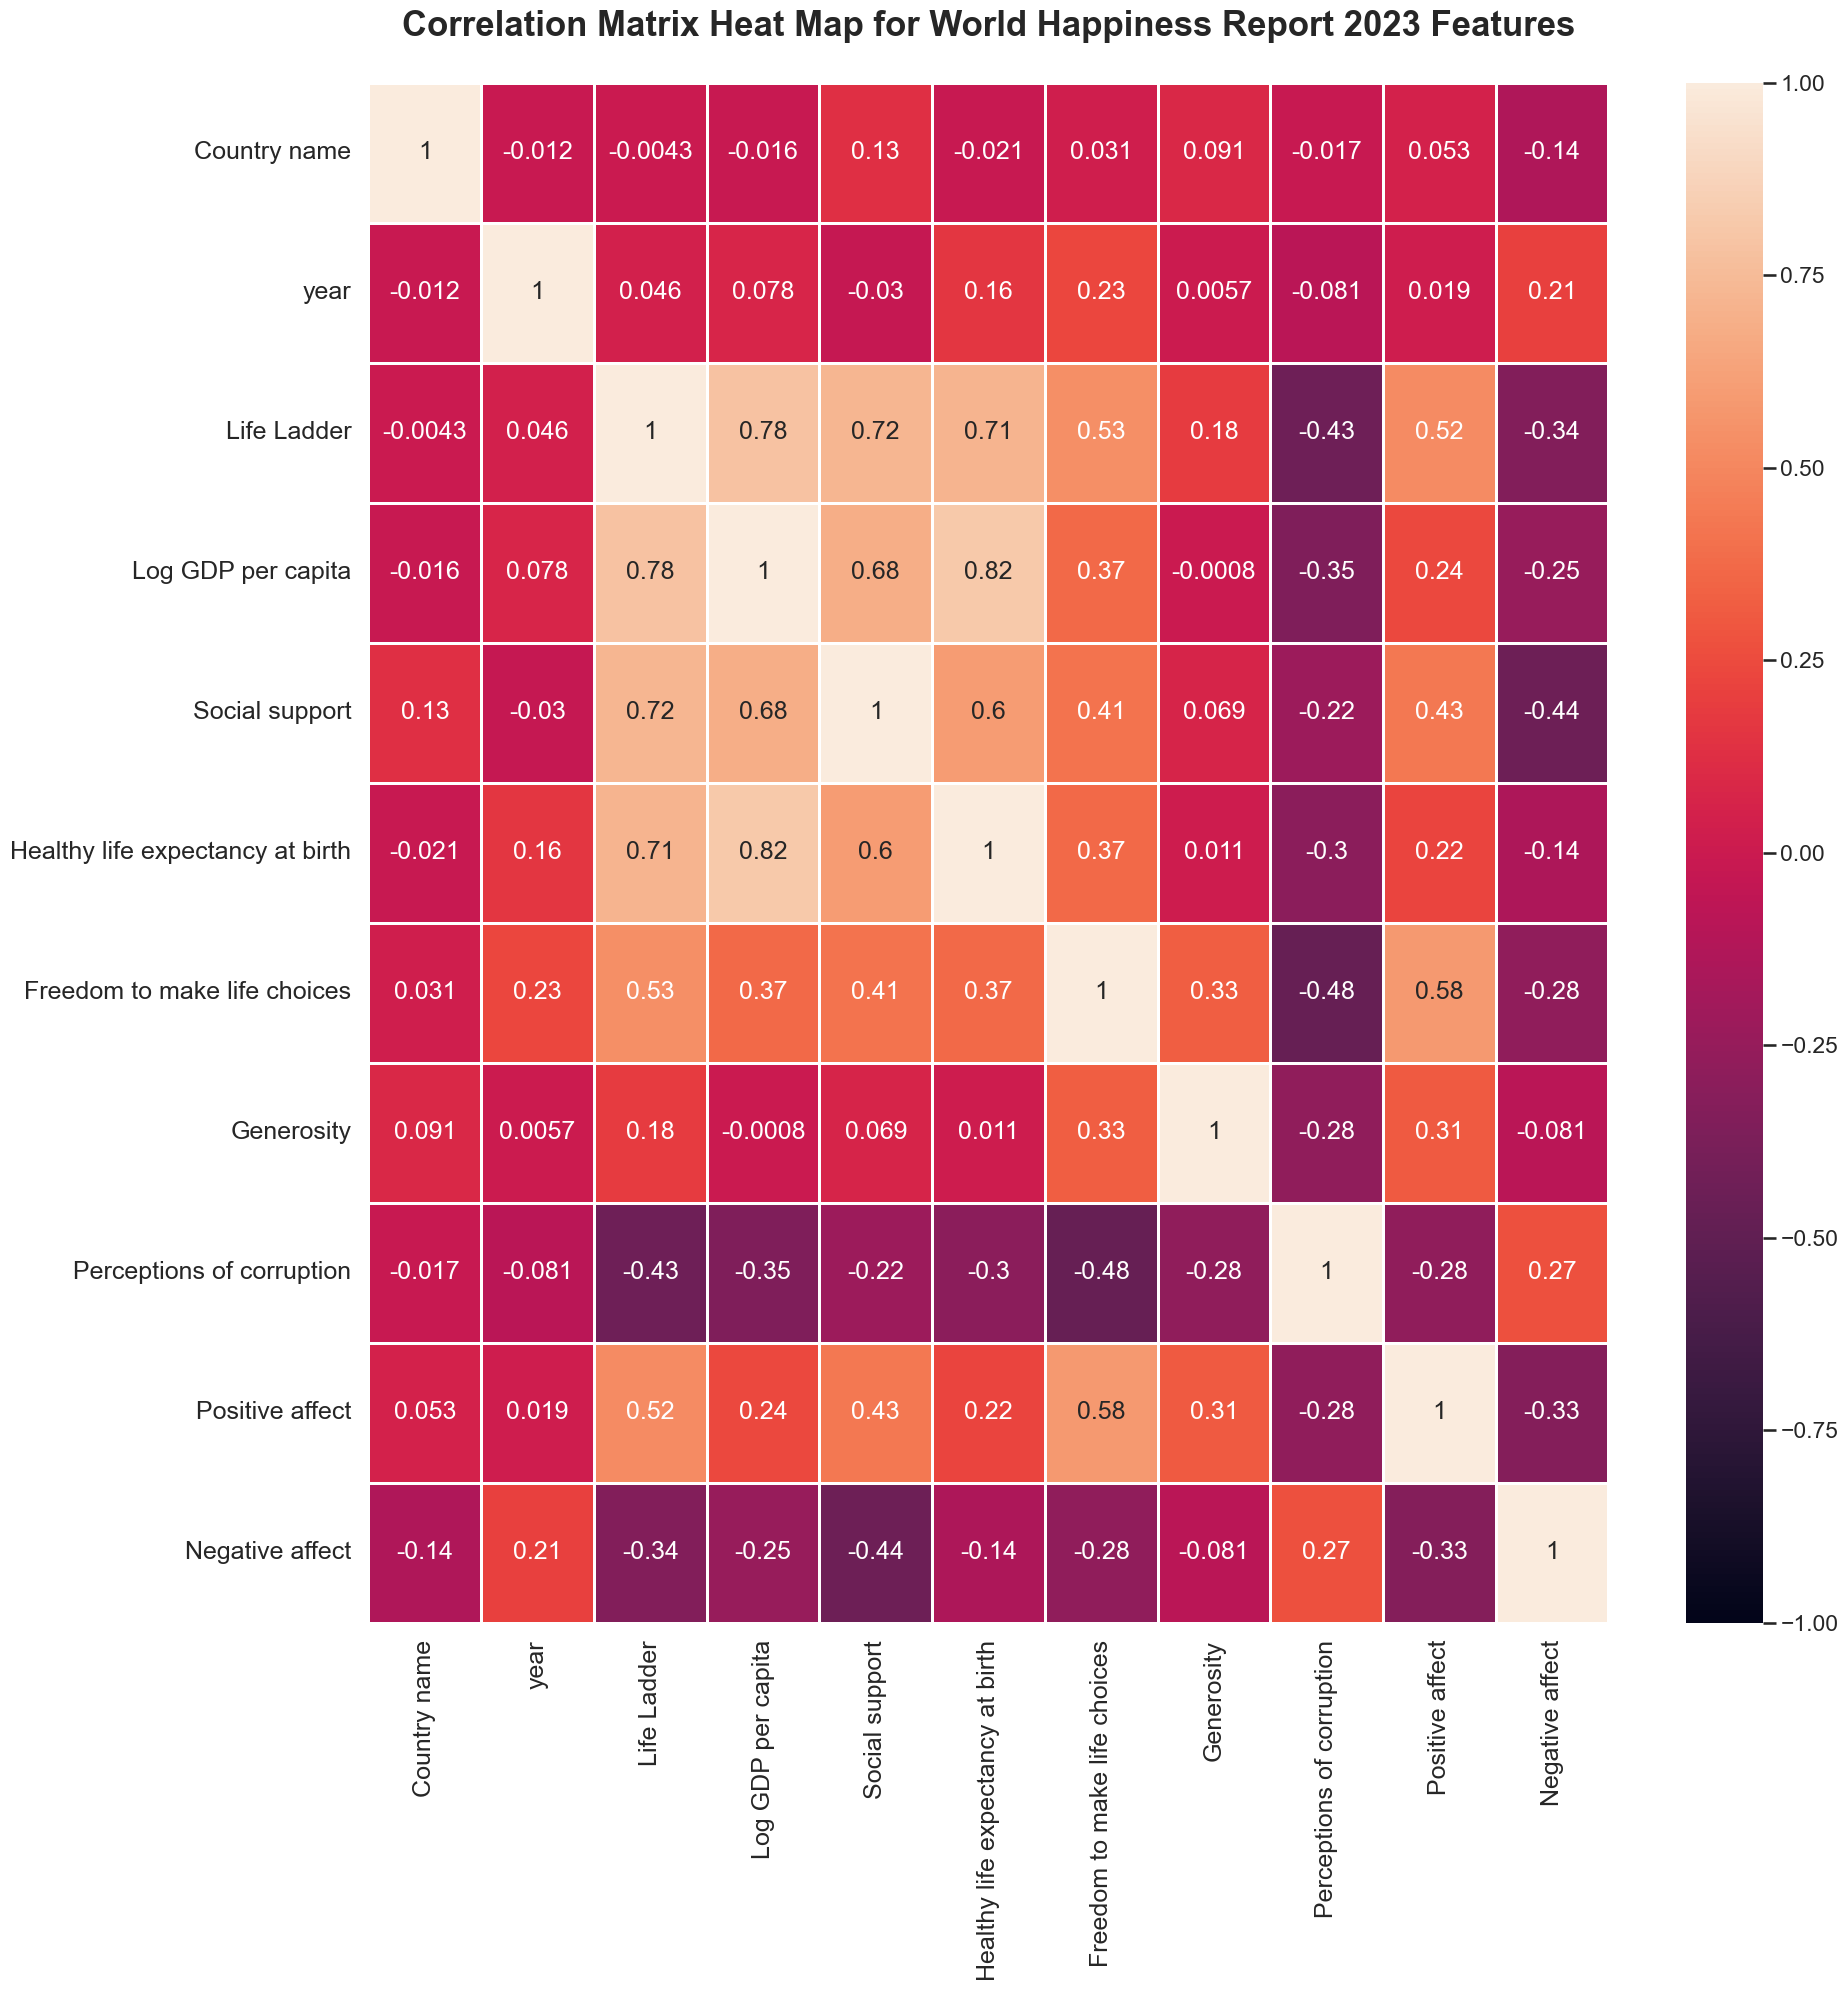

In [202]:
# 1.5 Correlation Matix Heatmap
# Serialize country name strings into numbers so that correlations can be made on them.
whr_data_frame['Country name'] = LabelEncoder().fit_transform(whr_data_frame['Country name'])
corr_matrix = whr_data_frame.corr()
plt.figure(figsize=(20, 20))
axis = sns.heatmap(corr_matrix,
            annot=True,
            linewidths=1.0,
            vmin=-1.0,
            vmax=1.0,
            annot_kws={
                "fontsize": 18
            })

axis.set_xticklabels(axis.get_xticklabels(), fontsize=18)
axis.set_yticklabels(axis.get_yticklabels(), fontsize=18)
plt.title("Correlation Matrix Heat Map for World Happiness Report 2023 Features\n",
          fontsize=25,
          fontweight="bold")
plt.show()